# rotor

> definition of rotor class. Supports only spm rotor topology. Calculates all necessary parameters required for rotor component calculations

In [ ]:
#| default_exp rotor

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
from PIL import Image

## rotor class is defined by the following parameters

1. poles
2. outer diameter
3. inner diameter fraction
4. pole embrace fraction
5. magnet thickness fraction
6. stack length
7. magnet grade
8. steel grade

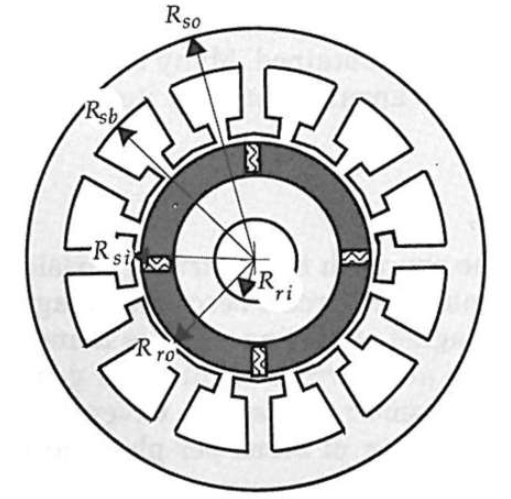

In [ ]:
#|echo: false
Image.open('./Images/rotor_dims.png')

In [ ]:
#| export
class rotor:
    def __init__(self):
        self.poles = 0
        self.outerdiameter = 0
        self.innerdiameter_fraction = 0
        self.poleembrace = 0
        self.magnetthickness_fraction = 0
        self.stacklength = 0 
        self.magnetgrade = 0
        self.steel_grade = 0
        self.valid = False
        self.dims = {}
    
    def valid_design(self):

        # check number of slots
        if self.poles <= 0 or self.poles%2 != 0:
            print('Invalid rotor poles for electric motor')
            return 0
        
        # verify stator outer diameter
        if self.outerdiameter <= 0:
            print('Invalid rotor outer diameter')
            return 0
        
        self.valid = True
    
    def calculate_parameters(self):
        """calculate dimensions requied for calculation rotor properties
        """
        Rro = self.outerdiameter/2
        Rri = Rro*self.innerdiameter_fraction
        lm = (Rro - Rri)*self.magnetthickness_fraction
        a_m = self.poleembrace
        Am = np.pi(Rro**2 - Rri**2)*self.poleembrace
        th_p = np.pi*2/self.poles


### test examples

In [ ]:
r1 = rotor()
r1.valid_design()

Invalid rotor poles for electric motor


0

In [ ]:
r1 = rotor()
r1.poles = 10
r1.outerdiameter = 73
r1.innerdiameter_fraction = 25/73
r1.poleembrace = 0.83
r1.magnetthickness_fraction = 2*4/(73 - 25)
r1.stacklength = 60
r1.magnetgrade = 'N30'
r1.steel_grade = '50C470'
r1.valid_design()
r1.valid

True

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()